# Classificación de imágenes con Redes Neuronales Convolucionales

Bienvenidos a la primera semana del segundo certificado en aprendizaje profundo o *deep learning*! Vamos a usar redes neuronales convolucionales (CNNs por sus siglas en inglés) para permitir que nuestros computadores vean - algo que solo es posible gracias al aprendizaje profundo.

# Introducción a nuestra primera tarea: 'Perros vs Gatos'

Vamos a crear un modelo para participar en el concurso de Perros vs Gatos en Kaggle. Hay 25,000 fotos etiquetadas de perros y gatos para entrenamiento, y 12,500 en el set de prueba que tenemos que intentar etiquetar para este concurso. De acuerdo con la página de Kaggle, cuando se lanzó este concurso (finales del 2013): "El estado del arte: La literatura actual suguiere que clasificadores mecánicos logran un puntaje superior al 80% en esta tarea". Así que si podemos sobrepasar el 80%, estaremos en la vanguardia del 2013!

In [1]:
# Coloca estos al inicio de cada notebook para poder recargar automáticamente y graficar en línea
%reload_ext autoreload
%autoreload 2
%matplotlib inline

Aquí importamos las librerías que necesitamos. vamos a aprender lo que hace cada una a lo largo del curso.

In [2]:
# Este archivo contiene todas las principales librerías externas que vamos a usar
from fastai.imports import *

In [3]:
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

`PATH` es la ruta a tus datos - si utilizas las configuraciones recomendadas de la lección no necesitas cambiarlo. `sz` es el tamaño al que queremos redimensionar las imágenes para asegurarnos de que el entrenamiento sea rápido. Vamos a hablar bastante sobre este parámetro a lo largo del curso. Déjalo en `224`por ahora. 

In [4]:
PATH = "data/dogscats/"
sz = 224

Es importante que tengas una GPU de NVidia funcionando. El marco de programación utilizado detrás de escenas para trabajar con GPUs de NVidia se llama CUDA. Por eso debes asegurarte de que la próxima línea te devuelva `True`antes de continuar. Si tienes problemas con esto puedes revisar el FAQ o pedir ayuda en [los foros](http://forums.fast.ai/)

In [5]:
torch.cuda.is_available()

True

Adicionalmente, NVidia provee funciones aceleradas especiales para aprendizaje profundo en un paquete llamado CuDNN. Aunque no es estrictamente nceseario, ayuda a mejorar el desempeño de entrenamiento de manera significativa y está incluido por defecto  en todas las configuraciones soportadas de fastai. Por eso, si la siguiente línea no te retorna `True`, tal vez deberías investigar por qué.

In [6]:
torch.backends.cudnn.enabled

True

## Pasos adicionales si NO estás usando Crestle, Paperspace o nuestros scripts

El conjunto de datos lo puedes encontrar en http://files.fast.ai/data/dogscats.zip. Lo puedes descargar directamente a tu servidor corriendo la siguiente línea en tu terminal: `wget http://files.fast.ai/data/dogscats.zip`. Deberías colocar los datos en un subdirectorio llamado `data/` en el directorio de este notebook. Ten en cuenta que estos datos ya están presentes en el template de fast.ai en Crestle y Paperspace.

# Primer vistazo a las imágenes de gatos

Nuestra librería asume que tienes los directorios de entrenamiento (*train*) y validación (*valid*). También asume que cada directorio tiene subdirectorios para cada clase que quieres reconocer (en este caso, 'perros' y 'gatos').

In [7]:
os.listdir(PATH)

['tmp', 'test1', 'valid', 'models', 'train', 'sample']

In [8]:
os.listdir(f'{PATH}/valid')

['cats', 'dogs']

In [10]:
files = os.listdir(f'{PATH}/valid/cats')[:5]
files

['cat.1935.jpg',
 'cat.12009.jpg',
 'cat.6320.jpg',
 'cat.2203.jpg',
 'cat.3808.jpg']

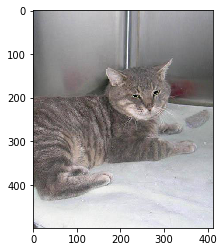

In [11]:
img = plt.imread(f'{PATH}/valid/cats/{files[0]}')
plt.imshow(img);

In [12]:
img.shape

(499, 412, 3)

In [13]:
img[:4,:4]

array([[[102, 110, 113],
        [107, 114, 120],
        [111, 118, 124],
        [110, 117, 125]],

       [[102, 110, 113],
        [107, 114, 120],
        [111, 118, 124],
        [110, 117, 125]],

       [[103, 111, 114],
        [106, 113, 119],
        [110, 117, 123],
        [109, 116, 124]],

       [[103, 111, 114],
        [106, 113, 119],
        [108, 115, 121],
        [108, 115, 123]]], dtype=uint8)

# Nuestro primer modelo: inicio rápido

Vamos a utilizar un modelo **preentrenado**, es decir, un modelo creado por otra persona para solucionar un problema diferente. En lugar de construir un modelo desde cero para resolver un problema similar, vamos a utilizar un modelo entrenado en el ImageNet (1.2 millones de imágenes y 1000 classes) para empezar. Este modelo es una Red Neuronal Convolucional (CNN), un tipo de Red Neuronal que construye modelos de última generación para visión computacional. Vamos a estar aprendiendo todo sobre CNN's a lo largo de este curso.

Vamos a utilizar el modelo **resnet34**. resnet34 es una versión del modelo que ganó el concurso ImageNet en el 2015. Aquí hay más info sobre [modelos resnet recientes](https://github.com/KaimingHe/deep-residual-networks). Vamos a estar estudiándolos en profundidad más adelante, pero por ahora nos vamos a enfocar en utilizarlos de manera efectiva.

A continuación puedes ver cómo entrenar y evaluar un modelo de *perros vs gatos* en 3 líneas de código y menos de 20 segundos:

In [14]:
# Utiliza la siguiente línea si necesitas resetear tus activaciones precalculadas
# shutil.rmtree(f'{PATH}tmp', ignore_errors=True)

In [15]:
arch = resnet34
data = ImageClassifierData.from_paths(PATH, tfms=tfms_from_model(arch, sz))
learn = ConvLearner.pretrained(arch, data, precompute=True)
learn.fit(0.01, 2)

HBox(children=(IntProgress(value=0, description='Epoch', max=2), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                     
    0      0.055407   0.029089   0.990723  
    1      0.037895   0.029329   0.98877                      



[0.029328547, 0.98876953125]

Qué tan bueno es este modelo? Como habíamos mencionado, antes de este concurso, el estado del arte era una precisión del 80%. Este concurso logró un salto a 98.9% de precisión en su momento, siendo el ganador el autor de una librería popular de aprendizaje profundo. Increíblemente, menos de 4 años más tarde podemos sobrepasar ese resultado en segundos! Hasta el año pasado en este mismo curso, nuestro modelo inicial tenía una precisión del 98.3%. Casi el doble del error que estamos obteniendo solo un año después y ese tardaba alrededor de 10 minutos en entrenar. 

# Analizando resultados: viendo imágenes

Además de ver las métricas generales, es también una buena idea ver un ejemplo para cada uno de los siguientes casos:
1. Algunas etiquetas correctas al azar
2. Algunas etiquetas incorrectas al azar
3. Las etiquetas más correctas para cada clase (las que tienen mayor probabilidad de ser correctas)
4. Las etiquetas más incorrectas para cada clase (las que tienen mayor probabilidad de ser incorrectas)
5. Las etiquetas más inciertas (las probabilidades más cercanas a 0.5)

In [16]:
# Estas son las etiquetas del conjunto de validación
data.val_y

array([0, 0, 0, ..., 1, 1, 1])

In [17]:
# De aquí sabemos que 'gatos' tiene etiqueta 0 y 'perros' etiqueta 1
data.classes

['cats', 'dogs']

In [18]:
# Esto genera predicciones para el conjunto de validaciones en escala logarítmica
log_preds = learn.predict()
log_preds.shape

(2000, 2)

In [19]:
log_preds[:10]

array([[ -0.00002, -11.03527],
       [ -0.00049,  -7.62929],
       [ -0.00003, -10.38949],
       [ -0.00066,  -7.32093],
       [ -0.00002, -10.62783],
       [ -0.00012,  -9.02062],
       [ -0.     , -12.58455],
       [ -0.00008,  -9.47512],
       [ -0.00001, -11.41745],
       [ -0.     , -12.60929]], dtype=float32)

In [26]:
log_preds[-10:,:]

array([[ -7.50215,  -0.00055],
       [ -5.46101,  -0.00426],
       [ -2.82737,  -0.06099],
       [ -5.17876,  -0.00565],
       [ -7.33398,  -0.00065],
       [ -2.39849,  -0.09525],
       [ -5.7951 ,  -0.00305],
       [-11.56709,  -0.00001],
       [ -7.18228,  -0.00076],
       [ -0.43628,  -1.0397 ]], dtype=float32)

In [31]:
preds = np.argmax(log_preds,axis=1) # de probabilidades logarítmicas a 0 o 1
probs = np.exp(log_preds[:,1]) # prorbabilidad que sea perro 

In [32]:
def rand_by_mask(mask): return np.random.choice(np.where(mask)[0], 4, replace=False)
def rand_by_correct(is_correct): return rand_by_mask((preds == data.val_y) == is_correct)

In [33]:
def plots(ims, figsize=(12,6), rows=1, titles=None):
    f = plt.figure(figsize=figsize)
    for i in range(len(ims)):
        sp = f.add_subplot(rows, len(ims)//rows, i+1)
        sp.axis('Off')
        if titles is not None: sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i])

In [34]:
def load_img_id(ds, idx): return np.array(PIL.Image.open(PATH+ds.fnames[idx]))

def plot_val_with_title(idxs, title):
    imgs = [load_img_id(data.val_ds,x) for x in idxs]
    title_probs = [probs[x] for x in idxs]
    print(title)
    return plots(imgs, rows=1, titles=title_probs, figsize=(16,8))

Clasificados correctamente


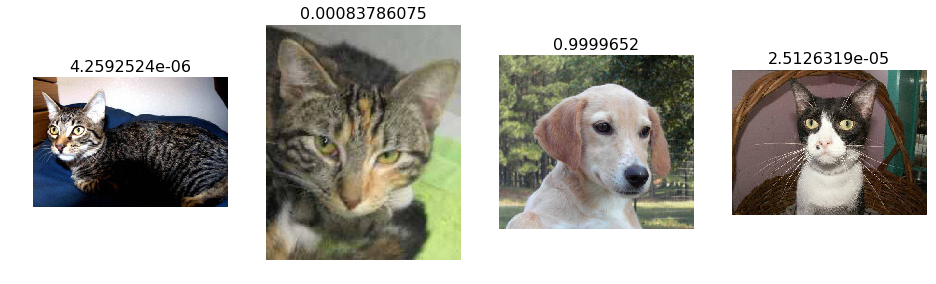

In [41]:
# 1. Algunas etiquetas correctas al azar
plot_val_with_title(rand_by_correct(True), "Clasificados correctamente")

Clasificados incorrectamente


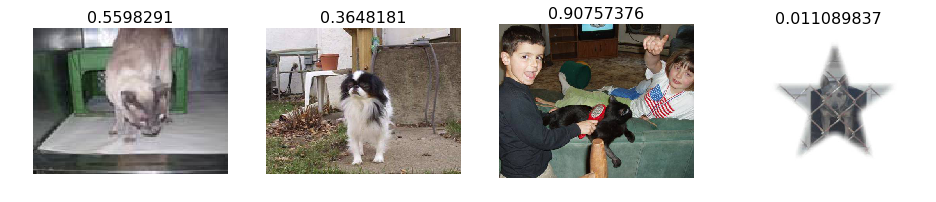

In [42]:
# 2. Algunas etiquetas correctas al azar
plot_val_with_title(rand_by_correct(False), "Clasificados incorrectamente")

In [37]:
def most_by_mask(mask, mult):
    idxs = np.where(mask)[0]
    return idxs[np.argsort(mult * probs[idxs])[:4]]

def most_by_correct(y, is_correct): 
    mult = -1 if (y==1)==is_correct else 1
    return most_by_mask(((preds == data.val_y)==is_correct) & (data.val_y == y), mult)

Gatos más correctos


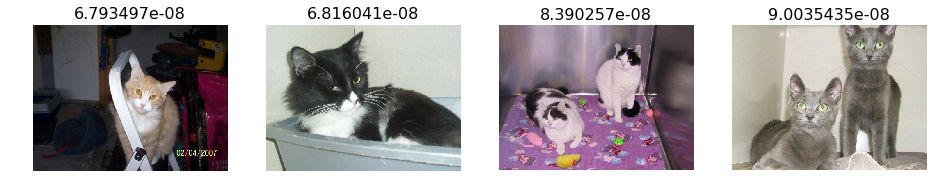

In [43]:
plot_val_with_title(most_by_correct(0, True), "Gatos más correctos")

Perros más correctos


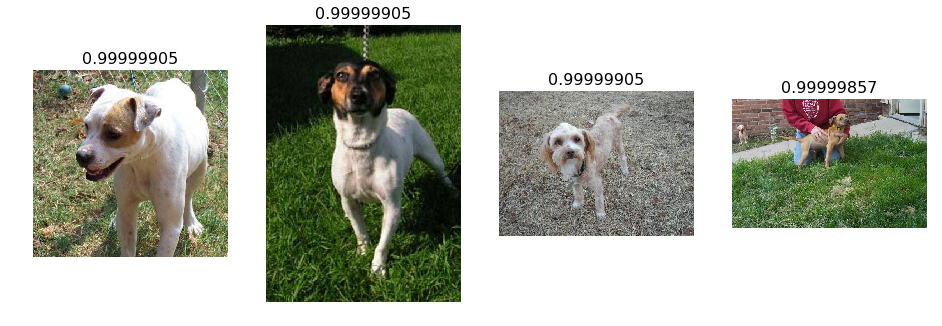

In [44]:
plot_val_with_title(most_by_correct(1, True), "Perros más correctos")

Gatos más incorrectos


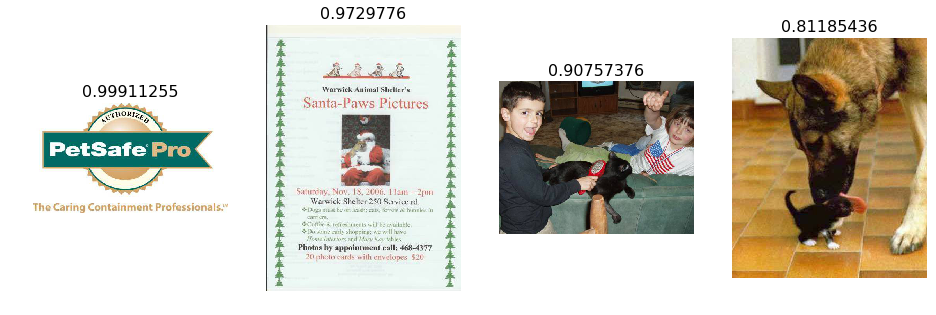

In [45]:
plot_val_with_title(most_by_correct(0, False), "Gatos más incorrectos")

Perros más incorrectos


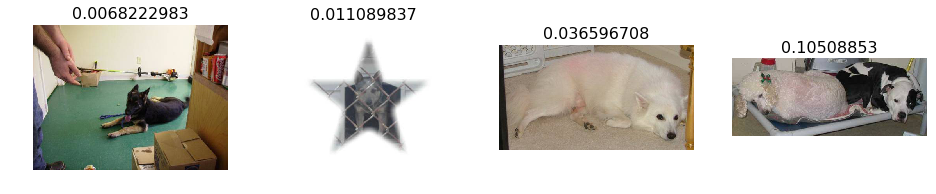

In [46]:
plot_val_with_title(most_by_correct(1, False), "Perros más incorrectos")

Predicciones más inciertas


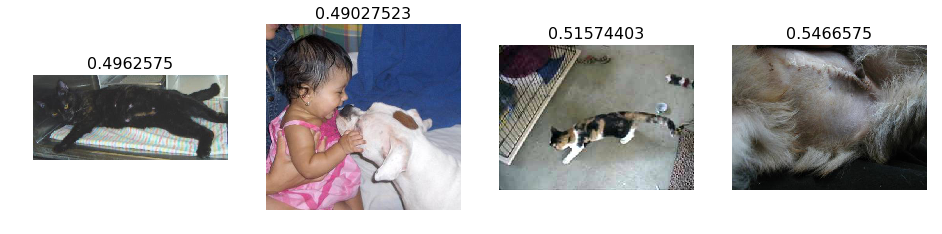

In [47]:
most_uncertain = np.argsort(np.abs(probs -0.5))[:4]
plot_val_with_title(most_uncertain, "Predicciones más inciertas")

# Escogiendo una tasa de aprendizaje

La tasa de aprendizaje o *learning rate* determina qué tan rápido o lento queremos actualizar los *pesos* (o *parametros*). La tasa de aprendizaje es uno de los parámetros más difíciles de fijar, porque afecta significativamente el desempeño del modelo.

El método `learn.lr_find()` te ayuda a encontrar una tasa de aprendizaje óptima. Usa una técnica desarrollada en el trabajo de investigación del 2015 [Cyclical Learning Rates for Training Neural Networks](http://arxiv.org/abs/1506.01186), mediante la cual simplemente vamos aumentando la tasa de aprendizaje desde un valor muy pequeño hasta que la función de pérdida (loss) deje de decrecer. Podemos graficar la tasa de aprendizaje a lo largo de varios "batch" para entender cómo se ve.

Primero creamos un nuevo aprendiz porque queremos saber cómo se encuentra la tasa de aprendizaje para un modelo nuevo (no entrenado)

In [48]:
learn = ConvLearner.pretrained(arch, data, precompute=True)

In [49]:
lrf = learn.lr_find()

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

 79%|███████▉  | 285/360 [00:05<00:01, 56.19it/s, loss=0.465]


Nuestro objeto `learn` contiene un atributo llamado `sched` que contiene el planificador de nuestra tasa de aprendizaje y tiene algunas funciones convenientes para graficar como esta:

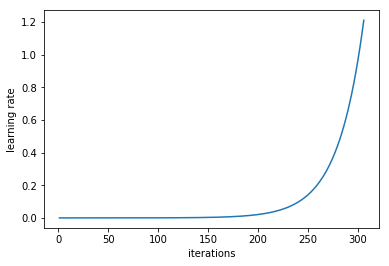

In [50]:
learn.sched.plot_lr()

Ten en cuenta que en la gráfica anterior *iteration* es una iteración )o *minibatch*) de SGD. En una época hay (num_train_samples/num_iterations) de SGD.

Podemos ver la gráfica de la pérdida versus la tasa de aprendizaje para observar en qué punto deja de decrecer:

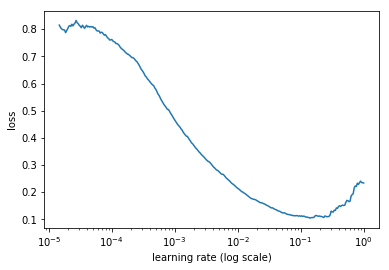

In [51]:
learn.sched.plot()

La tasa de aprendizaje todavía está mejorando en lr=1e-2 (0.01), así que esa es la vamos a utilizar. Ten en cuenta que la tasa de aprendizaje óptima puede cambiar a medida que entrenamos el modelo. Así que tal vez quieras volver a correr está función periódicamente.

# Mejorando nuestro modelo

## Aumento de datos

Si entrenas durante más épocas (epochs), te darás cuenta de que te empiezas a *sobreajustar* (overfit), lo que significa que nuestro modelo está aprendiendo a reconocer las imágenes específicas de nuestro conjunto de datos de entrenamiento, en lugar de generalizar para lograr buenos resultados también en el conjunto de validación. Una manera de solucionar esto es efectivamente creando más datos a traves de *aumento de datos* (data augmentation). Esto hace referencia a realizar cambios aleatorios de las imágenes en maneras que no deberían impactar su interpretación, como voltearlas horizontalmente, hacer zoom y rotarlas. 

Podemos hacer esto pasando `aug_tfms` (*augmentation transforms*) a `tfms_from_model`, con una lista de funciones para aplicar sobre las imágenes que las cambian aleatoriamente según queramos. Para fotos que principalmente se han tomado de un lado (como la mayoría de fotos de perros y gatos, a diferencia de fotos desde arriba como fotos satelitales) podemos utilizar una lista predefinida de funciones llamada `transforms_side_on`. Podemos especificar el zoom aleatorio de imágenes hasta una escala determinada agregando el parámetro `maz_zoom`.

In [52]:
tfms = tfms_from_model(resnet34, sz, aug_tfms=transforms_side_on, max_zoom=1.1)

In [55]:
def get_augs():
    data = ImageClassifierData.from_paths(PATH, bs=2, tfms=tfms, num_workers=1)
    x,_ = next(iter(data.aug_dl))
    return data.trn_ds.denorm(x)[1]

In [56]:
ims = np.stack([get_augs() for i in range(6)])

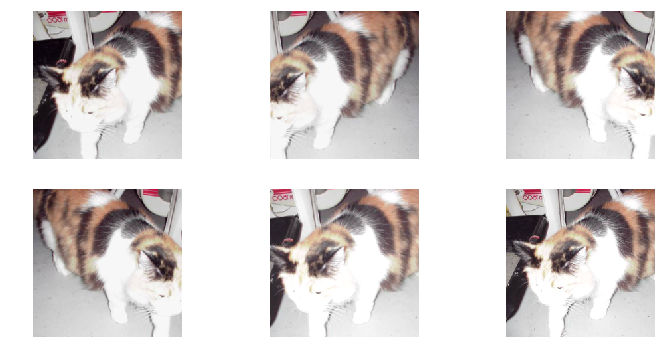

In [58]:
plots(ims, rows=2)

Ahora podemos crear un nuevo objeto `data`que incluye el aumento de estas transformaciones.

In [59]:
data = ImageClassifierData.from_paths(PATH, tfms=tfms)
learn = ConvLearner.pretrained(arch, data, precompute=True)

In [60]:
learn.fit(1e-2, 1)

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                     
    0      0.060613   0.028848   0.989258  



[0.028848398, 0.9892578125]

In [61]:
learn.precompute=False

Por defecto, cuando creamos un aprendiz, *congela* todas las capas excepto la última. Esto significa que solo está actualizando los pesos de las última capa cuando llamamos `fit`.

In [62]:
learn.fit(1e-2, 3, cycle_len=1)

HBox(children=(IntProgress(value=0, description='Epoch', max=3), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                     
    0      0.044162   0.027679   0.98877   
    1      0.055345   0.026211   0.988281                     
    2      0.036565   0.025332   0.98877                      



[0.025331981, 0.98876953125]

Qué es el parámetro `cycle_len`? Lo que hemos hecho aquí es utilizar una técnica llamada *stochastic gradient descent with restarts (SGDR)*, una variante de *learning rate annealing*, que gradualmente disminuye la tasa de aprendizajemientras progresa el entrenamiento. Esto es útil porque cuando nos acercamos a los pesosoptimos queremos tomar pasos más cortos.

Sin embargo, puede ser que nos encontramos en una zona del espacio de nuestros pesos que no es muy resiliente - es decir, pequeños cambios a los pesos puede generar grandes cambios en la pérdida. Queremos animar a nuestro modelo a encontrar zonas del espacio que son a la vez precisas y estables. Por eso, periódicamente aumentamos la tasa de aprendizaje (este es el 'restart' o reinicio en 'SGDR'). Esto obliga al modelo a saltar a una parte diferente del espacio si la zona actual es muy "puntiaguda". Aquí hay una imagen de cómo se podría ver si reiniciamos la tasa de aprendizaje 3 veces (en este trabajo lo llaman "cyclic LR schedule"):

<img src="images/sgdr.png" width="80%">
(Del trabajo de investigación [Snapshot Ensembles](https://arxiv.org/abs/1704.00109)).

El número de épocas entre cada reinicio está definido por `cycle_len`. Nos referimos al número de veces que esto sucede como el *número de ciclos* y este es el número que realmente pasamos al segundo parámetro de `fit()`. Así que nuestras tasas de aprendizaje reales se ven de la siguiente manera:

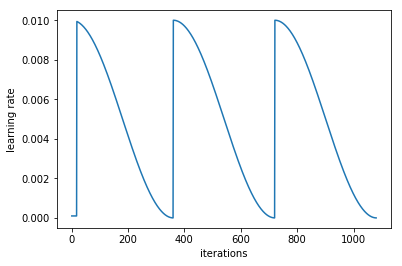

In [64]:
learn.sched.plot_lr()

Nuestra pérdida de validación no está mejorando mucho, así que probablemente no tiene sentido seguir entrenando solo la última capa.

Como tenemos un modelo relativamente bueno hasta el momento, a lo mejor nos gustaría guardarlo para que lo podamos cargar nuevamente luego sin tener que volver a entrenar desde cero.

In [65]:
learn.save('224_lastlayer')

In [ ]:
learn.load('224_lastlayer')

## Afinamiento y differential learning rate annealing

Ahora que hemos entrenado una buena capa final, podemos afinar (fine-tune) las demás capas. Para decirle al modelo que queremos descongelar las capas restantes, simplemente utiliza `unfreeze()`.

In [66]:
learn.unfreeze()

Ten en cuenta que las demás capas *ya fueron* entrenadas para reconocer imágenes de ImageNet (mientras que nuestra última capa fue inicializada de manera aleatoria). Así que queremos tener cuidado de no destruir los pesos cuidadosamente afinados que ya están ahí.

Generalmente, las primeras capas tienen características más genéricas. Por eso nos esperaríamos que requieren menos afinamiento para nuevos conjuntos de datos. Por este motivo utilizaremos diferentes tasas de aprendizaje para distintas capas: las primeras capas estarán en 1e-4, las de la mitad en 1e-3 y nuestras capas finales las dejaremos en 1e-2 como antes. Nosotros llamamos esta técnica *tasas de aprendizaje diferenciales* (differential learning rates), aunque no hay un nombre estándar en la literatura para esta técnica que nosotros conozcamos.

In [67]:
lr = np.array([1e-4, 1e-3, 1e-2])

In [69]:
learn.fit(lr, 3, cycle_len=1, cycle_mult=2)

HBox(children=(IntProgress(value=0, description='Epoch', max=7), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                     
    0      0.052743   0.02513    0.992676  
    1      0.038383   0.020804   0.992676                     
    2      0.029099   0.020476   0.992676                     
    3      0.03415    0.02255    0.992676                     
    4      0.020935   0.022058   0.992676                     
    5      0.028354   0.020613   0.993164                     
    6      0.017273   0.020486   0.993164                     



[0.020485586, 0.9931640625]

Otro truco que estamos utilizando aquí es agregar el parámetro `cycle_mult`. Veamos la siguiente gráfica a ver si puede averiguar lo que este parámetro está haciendo:

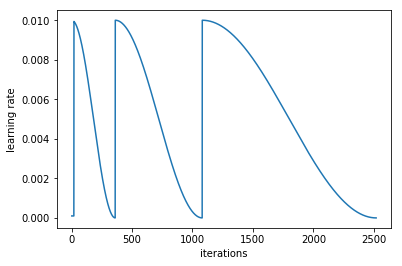

In [70]:
learn.sched.plot_lr()

Ten en cuenta que lo que estamos graficando aquí es la tasa de aprendizaje para las *capas finales*. Las tasas de aprendizaje para las primeras capas están fijas en los múltiplos que asignamos anteriormente (las primeras capas tienen una tasa 100x menor y las de la mitad una tasa 10x veces menor dado que escogimos `lr=np.array([1e-4,1e-3,1e-2])`).

In [71]:
learn.save('224_all')

In [ ]:
learn.load('224_all')

Existe otro uso para el aumento de datos: utilizarlo en el momento de *inferir* (también llamado momento de *prueba* o del test). esto se conoce como *test time augmentation* o simplemete *TTA*.

TTA no solo hace predicciones sobre las imágenes en el conjunto de valdicación, sino también sobre una cantidad de versiones aleatoriamente aumentadas (por defecto utiliza la imagen original y 4 versiones aleatoriamente aumentadas). Luego utiliza el promedio entre las predicciones de esa imagen. Para usar TTA en nuestro conjunto de validación podemos utilizar el método `TTA()` del aprendiz.

In [72]:
log_preds, y = learn.TTA()
probs = np.mean(np.exp(log_preds), 0)

In [73]:
accuracy_np(probs, y)

0.9945

Generalmente vemos una reducción del 10-20% en este conjunto de datos utilizando TTA en este momento. Un resultado bastante asombroso para una técnica tan fácil y rápida.

# Analizando resultados

## Matriz de confusión

In [74]:
preds = np.argmax(probs, axis=1)
probs = probs[:,1]

Una manera común de analizar resultados de un modelo de clasificación es utilizar una [matriz de confusión](http://www.dataschool.io/simple-guide-to-confusion-matrix-terminology/). Scikit-learn tiene una función conveniente que podemos utilizar para este propósito:

In [75]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y, preds)

Podemos imprimir la matriz de confusión podemos mostrar un gráfico (que normalmente es más útil cuando trabajamos con una gran cantidad de categorías).

[[996   4]
 [  7 993]]


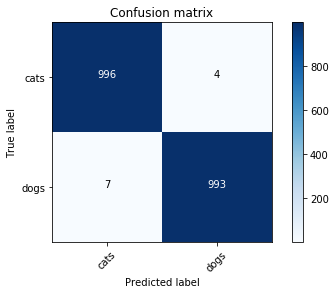

In [76]:
plot_confusion_matrix(cm, data.classes)

## Ver nuevamente las fotos

Gatos más incorrectos


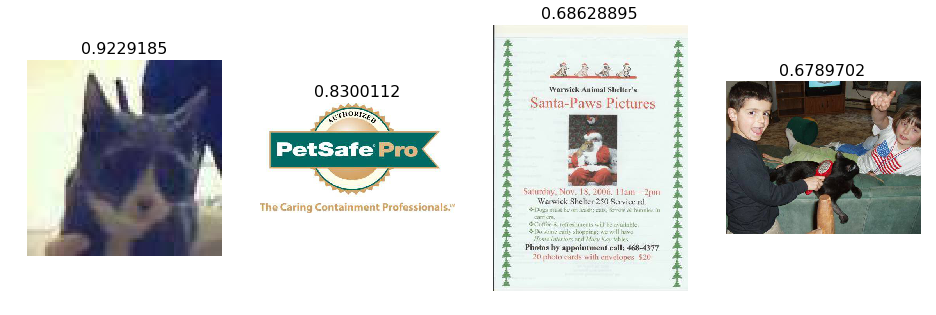

In [77]:
plot_val_with_title(most_by_correct(0, False), "Gatos más incorrectos")

Perros más incorrectos


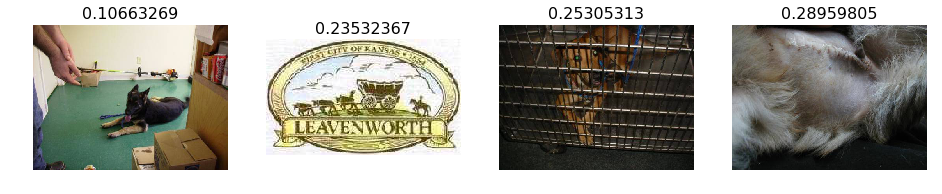

In [78]:
plot_val_with_title(most_by_correct(1, False), "Perros más incorrectos")

# Revisión: pasos sencillos para entrenar un clasificador de imágenes de clase mundial

1. Habilitar aumento de datos y precompute=True
2. Utilizar `lr_find()`para encontrar la tasa de aprendizaje más alta donde la pérdida todavía está mejorando
3. Entrenar la última capa utilizando activaciones precalculadas durante 1-2 épocas
4. Entrenar la última capa con aumento de datos (precompute=False) durante 2-3 épocas con cycle_len= 1
5. Descongela las capas
6. Asigna una tasa de aprendizaje 3x-10x menor para las primeras capas comparado a las capas finales
7. Utiliza `lr_find()` de nuevo
8. Entrena la red completa con cycle_mult=2 hasta sobreajustar (overfit)

# Entendiendo el código de nuestro primer modelo

Veamos el código de Perros vs gatos línea por línea

**tfms** significa *transformaciones*. `tfms_from_model` se encarga de redimensionar, recortar, normalización inicial (creando data con promedio=0 y desviación estándar=1) y mucho más.

In [83]:
tfms = tfms_from_model(resnet34, sz)

Necesitamos una *ruta* que apunta al conjunto de datos. En esta ruta almacenamos datos temporales y resultados finales. `ImageClassifierData.from_paths` lee datos de una ruta proporcionada y crea un conjunto de datos listo para entrenar.

In [85]:
data = ImageClassifierData.from_paths(PATH, tfms=tfms)

`ConvLearner.pretrained`construye un `aprendiz` (learner) que contiene un modelo preentrenado. La última capa del modelo tiene que ser reemplazada por una capa de las dimensiones correctas. El modelo preentrenado fue entrenado para 1000 clases y, por lo tanto, la última capa predice un vector con 1000 probabilidades. El modelo de perros y gatos necesita producir un vector de dos dimensiones. El siguiente diagrama muestra un ejemplo de cómo se hizo en una de los primeros CNNs exitosos . La capa "FC8" aquí es reemplazado por una capa nueva de 2 outputs.

<img src="images/pretrained.png" width="500">
[imagen original](https://image.slidesharecdn.com/practicaldeeplearning-160329181459/95/practical-deep-learning-16-638.jpg)

In [87]:
learn = ConvLearner.pretrained(resnet34, data, precompute=True)

Aprendemos los *parámetros* ajustando el modelos a los datos. Los *hiperparámetros* son otro tipo de parámetros que no pueden ser aprendidos directamente por el proceso regular de entrenamiento. Estos parámetros expresan propiedades a "alto nivel" del modelo como complejidad y qué tan rápido debería aprender. Dos ejemplos de hiperparámetros son la *tasa de aprendizaje* y el *número de épocas*.

Durante el entrenamiento iterativo de una red neuronal, un *batch* o *mini-batch* es un subconjunto de datos de entrenamiento utilizados en una iteración de Stochastic Gradient Descent (SGD). Una *época* es una única pasada de todo el conjunto de entrenamiento y consiste de varias iteraciones de SGD. 

Ahora podemos *ajustar* (fit) el modelo, eso es, utilizar *descenso de gradiente* o gradient descent para encontrar los mejores parámetros para la capa completamente conectada que agregamos que puede separar entre imágenes de perros y gatos. Tenemos que pasar dos hiperparámetros: la *tasa de aprendizaje* (generalmente 1e-2 o 1e-3 son un buen punto de partida, vamos a hablar más de esto a continuación) y el *número de épocas* (puedes pasar un número alto y simplemente detener el entrenamiento cuando ves que ya no está mejorando. Luego volverlo a correr con el número de épocas que funcionar bien.)  

In [88]:
learn.fit(1e-2, 1)

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                     
    0      0.047455   0.031999   0.987305  



[0.03199939, 0.9873046875]

# Analizando resultados: pérdida y precisión

Cuando corremos `learn.fit()`imprimimos 3 valores de desempeño (ver arriba). Aquí 0.047 es el valor de la *pérdida* o loss en el conjunto de entrenamiento, 0.032 es el valor de la pérdida en el conjunto de validación y 0.987 es la precisión de validación. Qué es la pérdida? Qué es precisión? Por qué no mostrar solo la precisión?

**Precisión** es la proporción de predicciones correctas frente al número total de predicciones.

En el aprendizaje automático o "machine learning" la **función de pérdida** o función de costo representa el precio pagado por falta de precisión en las predicciones.

La pérdida asociada a un ejemplo en clasificación binaria viene dado por: `-(y * log(p) + (1-y) * log(1-p))` donde `y` es la etiqueta real de `x` y `p` es la probabilidad pronosticada por nuestro modelo de que la etiqueta es 1.

In [92]:
def binary_loss(y, p):
    return np.mean(-(y * np.log(p) + (1-y)*np.log(1-p)))

def acc(y,p):
    total = len(y)
    correct = 0
    for i in range(total):
        if y[i] == round(p[i]):
            correct += 1
    return correct/total

In [93]:
acts = np.array([1, 0, 0, 1])
preds = np.array([0.9, 0.1, 0.2, 0.8])

print('Accuracy:', acc(acts, preds))
print('Loss:', binary_loss(acts, preds))

Accuracy: 1.0
Loss: 0.164252033486018


En este pequeño ejemplo nuestra precisión es del 100% mientras que nuestra pérdida es de 0.16. Compara esto a la pérdida de 0.04 que obtenemos prediciendo perros y gatos. Ejercicio: juega con `preds` para lograr una pérdeda menor en este ejemplo.

**Ejemplo:** Aquí tienes un ejemplo de cómo calcular la pérdida para un problema de clasificación binario. Imagina una imagen x con etiqueta 1 y tu modelo genera una predicción de 0.9. En este caso la pérdida debería ser pequeña porque nuestro modelo está prediciendo una etiqueta de 1 con una alta probabilidad.

`pérdida = -log(0.9) = 0.10`

Ahora imagina que x tiene la etiqueta 0 pero nuestro modelo está prediciendo 0.9. En este caso la pérdida debería ser mucho más alta.

`pérdida = -log(1-0.9) = 2.30`

- Ejercicio: revisa los otros casos y convéncete de que tiene sentido.
- Ejercicio: cómo reescribirías `binary_loss` usando `if` en lugar de `*` y `+`?

Por qué no simplemente maximizar la precisión? La pérdida de clasificación binaria es una función más fácil de optimizar.